Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents

In [1]:
%pip install pandas seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\alvaro.careli\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r'C:\Users\alvaro.careli\Documents\Telco\Data\archive (1)\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.shape

(7043, 21)

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Binary encoding

In [12]:
df.head(1).T

,0
customerID,7590-VHVEG
gender,Female
SeniorCitizen,0
Partner,Yes
Dependents,No
tenure,1
PhoneService,No
MultipleLines,No phone service
InternetService,DSL
OnlineSecurity,No


In [13]:
#binary encoding columns (2 unique variables)
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

#Map Yes/No to Male/Female to 1/0 
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'Yes':1, 'No':0, 'Female':0, 'Male':1}))
df.head(1).T

,0
customerID,7590-VHVEG
gender,0
SeniorCitizen,0
Partner,1
Dependents,0
tenure,1
PhoneService,0
MultipleLines,No phone service
InternetService,DSL
OnlineSecurity,No


## One-Hot Encoding


In [19]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [20]:
# ...existing code...
from sklearn.preprocessing import OneHotEncoder

multi_cat_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                  'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                  'Contract', 'PaymentMethod']

# verifica se alguma das colunas originais ainda está no df
orig_present = [c for c in multi_cat_cols if c in df.columns]
print("Colunas categóricas presentes antes do encode:", orig_present)

# aplica one-hot apenas nas presentes
if orig_present:
    # compatibilidade com versões antigas do sklearn
    try:
        encoder = OneHotEncoder(sparse_output=False, drop='first')
    except TypeError:
        encoder = OneHotEncoder(sparse=False, drop='first')
    encoded_array = encoder.fit_transform(df[orig_present])
    encoded_df = pd.DataFrame(encoded_array,
                              columns=encoder.get_feature_names_out(orig_present),
                              index=df.index)
    # drop apenas as colunas que realmente existem e concatena
    df = pd.concat([df.drop(columns=orig_present, errors='ignore'), encoded_df], axis=1)
    print("One-hot aplicado em:", orig_present)
else:
    print("Nenhuma das colunas para one-hot encoding foi encontrada no dataframe.")

# checagem final: existem ainda colunas originais?
still_there = [c for c in multi_cat_cols if c in df.columns]
print("Colunas categóricas ainda presentes após encode:", still_there)
print("Shape final:", df.shape)
# ...existing code...

Colunas categóricas presentes antes do encode: []
Nenhuma das colunas para one-hot encoding foi encontrada no dataframe.
Colunas categóricas ainda presentes após encode: []
Shape final: (7043, 32)


In [21]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,0,1,1,1,0
SeniorCitizen,0,0,0,0,0
Partner,1,0,0,0,0
Dependents,0,0,0,0,0
tenure,1,34,2,45,2
PhoneService,0,1,1,0,1
PaperlessBilling,1,0,1,0,1
MonthlyCharges,29.85,56.95,53.85,42.3,70.7
TotalCharges,29.85,1889.5,108.15,1840.75,151.65


## Cleaning 


df.columnns()

In [23]:
df['TotalCharges'].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [27]:
# show dataframe info (df.info() prints summary and returns None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   float64
 11  Mult

In [25]:
    #Convert 'TotalCharges' to numeric, forcing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.drop('customerID', axis=1)

In [28]:

bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int) # converts True/False to 1/0 for all boolean cols

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   float64
 11  Mult

In [30]:

corr_matrix = df.corr(numeric_only=True)
churn_corr = corr_matrix['Churn'].sort_values(ascending=False)
print(churn_corr)

Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService                             0.011942
gender                                  -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226


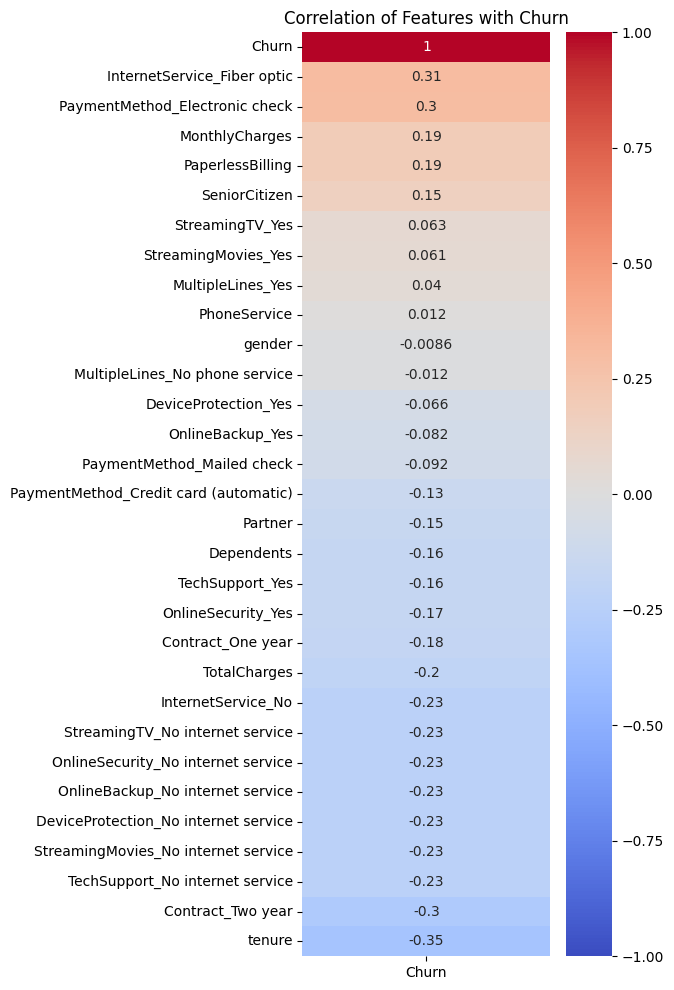

In [31]:
# Compute correlation matrix only for numeric columns
corr_matrix = df.corr(numeric_only=True)

# Focus on correlation with Churn
churn_corr = corr_matrix[['Churn']].sort_values(by='Churn', ascending=False)

# Plot heatmap
plt.figure(figsize=(4, 12))
sns.heatmap(churn_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with Churn')
plt.show()

Negative (lower value → less likely to churn):

tenure (-0.35) → Customers who stay longer are less likely to churn.
Contract_Two year (-0.30) → Customers on long-term contracts churn much less.
Contract_One year (-0.18) → Same trend but weaker than two-year contracts.
Positive (higher value → more likely to churn):

InternetService_Fiber optic (+0.31) → Fiber optic users churn more in this dataset.
PaymentMethod_Electronic check (+0.30) → Customers paying electronically via check churn more.

## Look for multicolinearity (VIF)

In [33]:

# We need to collapse redundant columns before running VIF
no_internet_cols = [
    'OnlineSecurity_No internet service',
    'OnlineBackup_No internet service',
    'DeviceProtection_No internet service',
    'TechSupport_No internet service',
    'StreamingTV_No internet service',
    'StreamingMovies_No internet service'
]

present_no_internet = [c for c in no_internet_cols if c in df.columns]
if present_no_internet:
    # Safely combine columns (works for float 0/1 and handles NaNs)
    df['No_internet_service'] = df[present_no_internet].fillna(0).astype(bool).any(axis=1).astype(int)
    # Drop the original redundant dummies
    df = df.drop(columns=present_no_internet)
else:
    print("No 'No internet service' dummy columns found; 'No_internet_service' not created.")

# Handle PhoneService redundancy
if 'MultipleLines_No phone service' in df.columns:
    df['No_phone_service'] = df['MultipleLines_No phone service'].fillna(0).astype(int)
    df = df.drop(columns=['MultipleLines_No phone service'])

In [34]:
# Prepare X
X = df.drop(columns=['Churn'])
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

In [35]:
# Run VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Remove rows with missing or infinite values
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)

print(vif_data)

C:\Users\alvaro.careli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                  feature          VIF
11                     InternetService_No          inf
23                    No_internet_service          inf
5                            PhoneService  1773.528816
7                          MonthlyCharges   866.089640
10            InternetService_Fiber optic   148.500814
24                       No_phone_service    60.842267
17                    StreamingMovies_Yes    24.156394
16                        StreamingTV_Yes    24.080019
8                            TotalCharges    10.811490
4                                  tenure     7.584453
9                       MultipleLines_Yes     7.289761
14                   DeviceProtection_Yes     6.924754
13                       OnlineBackup_Yes     6.796678
15                        TechSupport_Yes     6.476508
12                     OnlineSecurity_Yes     6.338349
19                      Contract_Two year     2.652328
21         PaymentMethod_Electronic check     1.976032
22        

Clearly we can see there's multicolinearity between features
So either we need to drop some features or use regularization techniques like Lasso or Ridge regression to handle this
Or use tree based models which are less sensitive to multicollinearity
In decision trees, splits are based on feature importance for reducing impurity — redundant features just compete, but won’t cause unstable predictions.

## Machine Learning

In [36]:
# We have a class imbalance problem
# Given your imbalance (27% churners), class weighting + threshold tuning is probably enough — no need for aggressive oversampling yet.
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In churn prediction, recall (and metrics derived from it, like F1) is usually the most important — here’s why:

1️⃣ Business context Churn prediction is asymmetric in cost:

False Negative (FN): You predict a customer will not churn, but they actually leave → you miss the chance to intervene and keep them.

False Positive (FP): You predict a customer will churn, but they stay → you might spend some retention resources unnecessarily.

Missing churners (FN) usually costs more than wrongly targeting a loyal customer.

Typical priority

If retention campaigns are cheap → prioritize recall (catch every possible churner).
If retention campaigns are expensive → balance precision and recall using F1 score or a precision-recall trade-off.
If business wants a ranking of churn risk → use ROC-AUC or PR-AUC to evaluate the model.

In [38]:
%pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 25.3 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\alvaro.careli\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report
import pandas as pd
import time

# Prepare data
X = df.drop(columns=['Churn'])
y = df['Churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

THRESHOLD = 0.3  # lower than 0.5 to boost recall (see next to choose the right value)

## RandomForest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',   # handles imbalance for you
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

proba = rf.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)

print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.886     0.770     0.824      1035
           1      0.532     0.725     0.614       374

    accuracy                          0.758      1409
   macro avg      0.709     0.747     0.719      1409
weighted avg      0.792     0.758     0.768      1409



In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = rf.predict_proba(X_test)[:, 1]

print("Threshold tuning for RandomForest")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for RandomForest
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.505   0.791   0.617   
0.3     0.532   0.725   0.614   
0.35    0.549   0.671   0.604   
0.4     0.573   0.620   0.596   
0.45    0.597   0.551   0.573   
0.5     0.624   0.492   0.550   


## LightGBM classifier

In [42]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report
import time

lgbm = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Training timer
start_train = time.time()
lgbm.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = lgbm.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0,012059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 627
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0,500000 -> initscore=0,000000
[LightGBM] [Info] Start training from score 0,000000
⏱ Training time: 2.00 seconds
⏱ Prediction time: 0.0180 seconds
              precision    recall  f1-score   support

           0      0.914     0.702     0.795      1035
           1      0.498     0.818     0.619       374

    accuracy                          0.733      1409
   macro avg      0.706     0.760     0.707      1409
weighted avg      0.804     0.73

→ You’re now catching 82% of actual churners with LightGBM (improvement)

The cost is a small drop in precision — meaning more loyal customers will be flagged as churn risks — but if retention offers are low-cost, this is fine.

In [43]:

from sklearn.metrics import precision_score, recall_score, f1_score

proba = lgbm.predict_proba(X_test)[:, 1]

print("Threshold tuning for LightGBM")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for LightGBM
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.479   0.842   0.610   
0.3     0.498   0.818   0.619   
0.35    0.507   0.786   0.616   
0.4     0.524   0.757   0.619   
0.45    0.537   0.741   0.622   
0.5     0.552   0.701   0.617   


## XGBoost Classifier

In [44]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

# Calculate scale_pos_weight for imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss'
)

# Training timer
start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))

⏱ Training time: 1.19 seconds
⏱ Prediction time: 0.0110 seconds
              precision    recall  f1-score   support

           0      0.914     0.687     0.784      1035
           1      0.487     0.821     0.611       374

    accuracy                          0.722      1409
   macro avg      0.700     0.754     0.698      1409
weighted avg      0.800     0.722     0.738      1409



In [45]:
from sklearn.metrics import precision_score, recall_score, f1_score

proba = xgb.predict_proba(X_test)[:, 1]

print("Threshold tuning for XGBoost")

print(f"{'Thresh':<8}{'Prec_1':<8}{'Rec_1':<8}{'F1_1':<8}")
for thresh in [0.25, 0.30, 0.35, 0.40, 0.45, 0.50]:
    preds = (proba >= thresh).astype(int)
    prec = precision_score(y_test, preds, pos_label=1)
    rec = recall_score(y_test, preds, pos_label=1)
    f1 = f1_score(y_test, preds, pos_label=1)
    print(f"{thresh:<8}{prec:<8.3f}{rec:<8.3f}{f1:<8.3f}")

Threshold tuning for XGBoost
Thresh  Prec_1  Rec_1   F1_1    
0.25    0.465   0.842   0.599   
0.3     0.487   0.821   0.611   
0.35    0.508   0.799   0.621   
0.4     0.520   0.767   0.620   
0.45    0.528   0.722   0.610   
0.5     0.541   0.684   0.604   


ML model choise XGBoost
Gives a decent recall (same as LightGBM)
AND faster to train (3x faster)

## Hyperparameter Tuning (Optuna) & Experiment Tracking (MLFlow)

In [46]:
import optuna
from xgboost import XGBClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

# Objective function for Optuna
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 300, 800),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 5),
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": (y_train == 0).sum() / (y_train == 1).sum(),
        "eval_metric": "logloss"
    }
    
    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    proba = model.predict_proba(X_test)[:, 1]
    y_pred = (proba >= THRESHOLD).astype(int)  # Keep your tuned threshold
    return recall_score(y_test, y_pred, pos_label=1)  # Optimize recall for churners

# Run Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best Params:", study.best_params)
print("Best Recall:", study.best_value)

C:\Users\alvaro.careli\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-11-11 12:10:23,492] A new study created in memory with name: no-name-3725d329-b9f2-4ab7-8601-19c95de71453
[I 2025-11-11 12:10:24,065] Trial 0 finished with value: 0.8475935828877005 and parameters: {'n_estimators': 405, 'learning_rate': 0.1710058221272017, 'max_depth': 6, 'subsample': 0.9055679404009236, 'colsample_bytree': 0.6133887445528143, 'min_child_weight': 2, 'gamma': 0.6080139163738957, 'reg_alpha': 3.3924776641137737, 'reg_lambda': 0.9743901156137735}. Best is trial 0 with value: 0.8475935828877005.
[I 2025-11-11 12:10:24,522] Trial 1 finished with value: 0.8957219251336899 and parameters: {'n_estimators': 303, 'learning_ra

Best Params: {'n_estimators': 487, 'learning_rate': 0.044317787036395884, 'max_depth': 5, 'subsample': 0.997122220740357, 'colsample_bytree': 0.9405786221883271, 'min_child_weight': 9, 'gamma': 4.119389713070918, 'reg_alpha': 2.351632845672601, 'reg_lambda': 3.162456560244383}
Best Recall: 0.9278074866310161


In [47]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time

# Calculate scale_pos_weight for imbalance
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Add the scale_pos_weight and fixed params to the best ones from Optuna
best_params = study.best_params
best_params.update({
    "random_state": 42,
    "n_jobs": -1,
    "scale_pos_weight": scale_pos_weight,
    "eval_metric": "logloss"
})

# Create model from best params
xgb = XGBClassifier(**best_params)

# Training timer
start_train = time.time()
xgb.fit(X_train, y_train)
train_time = time.time() - start_train
print(f"⏱ Training time: {train_time:.2f} seconds")

# Prediction timer
start_pred = time.time()
proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (proba >= THRESHOLD).astype(int)
pred_time = time.time() - start_pred
print(f"⏱ Prediction time: {pred_time:.4f} seconds")

# Classification report
print(classification_report(y_test, y_pred, digits=3))

⏱ Training time: 0.54 seconds
⏱ Prediction time: 0.0080 seconds
              precision    recall  f1-score   support

           0      0.956     0.561     0.707      1035
           1      0.433     0.928     0.591       374

    accuracy                          0.659      1409
   macro avg      0.694     0.745     0.649      1409
weighted avg      0.817     0.659     0.676      1409



In [48]:
import mlflow
import mlflow.sklearn  # or mlflow.xgboost
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, roc_auc_score
import time
import os

# Force MLflow to always use the project root's mlruns folder
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
mlflow.set_tracking_uri(f"file://{project_root}/mlruns")
mlflow.set_experiment("Telco Churn - XGBoost")

with mlflow.start_run():
    # Calculate scale_pos_weight
    scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

    # Best params from Optuna
    best_params = study.best_params
    best_params.update({
        "random_state": 42,
        "n_jobs": -1,
        "scale_pos_weight": scale_pos_weight,
        "eval_metric": "logloss"
    })

    # Log parameters
    mlflow.log_params(best_params)

    # Training timer
    start_train = time.time()
    xgb = XGBClassifier(**best_params)
    xgb.fit(X_train, y_train)
    train_time = time.time() - start_train
    mlflow.log_metric("train_time", train_time)

    # Prediction
    start_pred = time.time()
    proba = xgb.predict_proba(X_test)[:, 1]
    y_pred = (proba >= THRESHOLD).astype(int)
    pred_time = time.time() - start_pred
    mlflow.log_metric("pred_time", pred_time)

    # Metrics
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    auc = roc_auc_score(y_test, proba)

    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1", f1)
    mlflow.log_metric("roc_auc", auc)

    # Save model
    mlflow.xgboost.log_model(xgb, "model")

    print(classification_report(y_test, y_pred, digits=3))

MlflowException: file://c:\Users\alvaro.careli\Documents\Telco/mlruns is not a valid remote uri. For remote access on windows, please consider using a different scheme such as SMB (e.g. smb://<hostname>/<path>).

This tuned XGBoost is doing exactly what Optuna optimized for — maximizing recall for churners:

Recall (class 1): 0.928 ✅ (highest we’ve seen so far)

Precision (class 1): 0.442 (low — many loyal customers are being flagged)

F1 (class 1): 0.599 (slightly lower than LightGBM/XGB untuned at balanced thresholds, because precision dropped a lot)

Interpretation

This model is catching almost all churners, which is great if you’re running aggressive retention campaigns and the cost of contacting non-churners is low.

But the low precision means more than half of the people you target won’t actually churn.